In [2]:
import json
from py2neo import Graph
from py2neo.data import Node, Relationship

# Need to get authentication working, currently NEO4J_AUTH=none
graph = Graph("bolt://matlaber5.media.mit.edu:7687")

#graph.delete_all()

n_nodes = graph.database.primitive_counts['NumberOfNodeIdsInUse']
n_relationships = graph.database.primitive_counts['NumberOfRelationshipIdsInUse']
print("Connected to graph database with {:,} nodes and {:,} relationships!".format
     (n_nodes, n_relationships))

Connected to graph database with 9,772,608 nodes and 55,362,560 relationships!


In [3]:
import pandas as pd
import time

start_time = time.time()
start_year, end_year, step = 1900, 1905, 5
dfs = []
for year in range(start_year, end_year+1, step):
    
    # < IS MUCH FASTER THAN <=
    print("Running PageRank on patents from < {}...".format(year), end=" ")
    query_start_time = time.time()
    query = """
    CALL algo.pageRank.stream(
         'MATCH (p:Patent) WHERE p.pub_date < "{}-01-01" AND p.pub_date <> "" RETURN id(p) as id'
        ,'MATCH (p1:Patent)-[:CITES]->(p2:Patent) RETURN id(p1) as source, id(p2) as target'
        ,{{graph:'cypher', iterations:20, write:false}})
    YIELD node, score
    WITH * 
    ORDER BY score DESC
    LIMIT 100
    RETURN 
        node.number AS number, 
        node.n_citations AS n_citations, 
        node.pub_date AS pub_date, 
        node.patent_citations AS patent_citations, 
        node.cited_by AS cited_by, 
        score;
    """.format(year)
#     print(query)
    df = graph.run(query).to_data_frame()
    df['year'] = year
    dfs.append(df)
    query_end_time = time.time()
    print("Done ({:.2f} minutes).".format((query_end_time-query_start_time)/60))
    
end_time = time.time()
print("Finished all calculations in {:.2f} minutes.".format((end_time-start_time)/60))

Running PageRank on patents from < 1900... Done (3.99 minutes).
Running PageRank on patents from < 1905... Done (3.87 minutes).
Finished all calculations in 7.86 minutes.


In [ ]:
# import pandas as pd
# import time

# start_time = time.time()
# start_year, end_year, step = 1900, 1905, 5
# dfs = []
# for year in range(start_year, end_year+1, step):
    
#     # < IS MUCH FASTER THAN <=
#     print("Running PageRank on patents from < {}...".format(year), end=" ")
#     query_start_time = time.time()
#     query = """
#     CALL algo.pageRank.stream(
#          'MATCH (p:Patent) WHERE p.pub_date < "{}-01-01" AND p.pub_date <> "" RETURN id(p) as id'
#         ,'MATCH (p1:Patent)-[:CITES]->(p2:Patent) RETURN id(p1) as source, id(p2) as target'
#         ,{{graph:'cypher', iterations:20, write:false}})
#     YIELD node, score
#     WITH * 
#     ORDER BY score DESC

#     RETURN 
#         node.number AS number, 
#         node.title AS title, 
#         node.inventors AS inventors, 
#         node.location AS location, 
#         node.n_citations AS n_citations, 
#         node.pub_date AS pub_date, 
#         node.patent_citations AS patent_citations, 
#         node.classifications AS classifications, 
#         node.cited_by AS cited_by, 
#         score;
#     """.format(year)
# #     print(query)
#     df = graph.run(query).to_data_frame()
#     df['year'] = year
#     dfs.append(df)
#     query_end_time = time.time()
#     print("Done ({:.2f} minutes).".format((query_end_time-query_start_time)/60))
    
# end_time = time.time()
# print("Finished all calculations in {:.2f} minutes.".format((end_time-start_time)/60))

In [4]:
df

,cited_by,n_citations,number,patent_citations,pub_date,score,year
0,"[US28325, USRE28325]",2,US22352,[],1858-12-21,0.21375,1905
1,"[US28325, USRE28325, US3293176]",3,US59418,[],1866-11-06,0.21375,1905
2,"[US3951371, US3889439]",2,US107,[],1836-01-01,0.15000,1905
3,"[US3384031, US20020182208, US20040146637, US20...",95,US1,[],1836-07-13,0.15000,1905
4,"[US3626850, FR2103499, FR2133919, FR2164438, U...",52,US2,[],1836-07-29,0.15000,1905
5,"[US20020176697, US20020028274, US20040131930, ...",39,US10,[],1836-08-10,0.15000,1905
6,"[US3680161, US4815603, US20020075792, US200400...",39,US9,[],1836-08-10,0.15000,1905
7,"[US20020176697, US20040046260, US20040141632, ...",27,US11,[],1836-08-10,0.15000,1905
8,"[US20020075792, US20040022091, US20040046260, ...",49,US7,[],1836-08-10,0.15000,1905
9,"[US20040210746, US20030229571, US20020075792, ...",71,US6,[],1836-08-10,0.15000,1905


In [7]:
pubd_list = df['pub_date'].tolist()
print(type(pubd_list[0]))

<class 'str'>


In [8]:
print(type(df['score']))
score_list = df['score'].tolist()

print(len(score_list))


<class 'pandas.core.series.Series'>
100


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


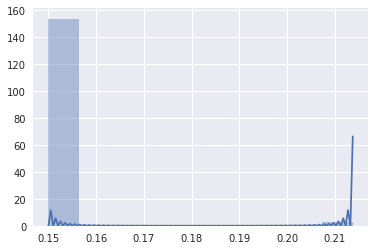

In [11]:
import seaborn as sns
from scipy import stats, integrate
import matplotlib.pyplot as plt
sns.set()
sns.distplot(score_list);


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


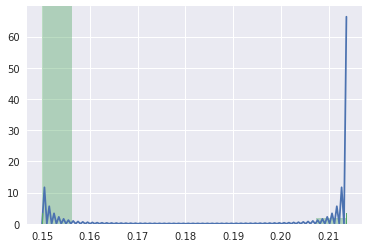

In [12]:
import seaborn as sns
sns.set()
#sns.distplot(data_test, rug=True, norm_hist=False)
sns.distplot(score_list,  rug=True, kde=True, hist=False, bins = 100)
sns.distplot(score_list,  rug=True, kde=False, hist=True, norm_hist=False)

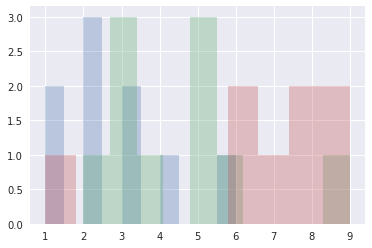

In [15]:
import numpy as np
x1 = np.random.normal(0, 0.8, 10000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
x1 = [1,2,3,2,4,6,1,2,3]
x2 = [3,5,6,3,4,5,9,5,3,2]
x3 = [6,7,9,8,6,8,9,1]
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=10)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

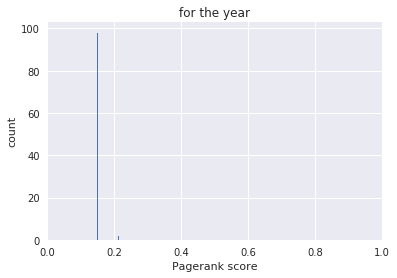

In [13]:
#print(score_list)
from matplotlib import pyplot as plt
plt.xlim(0, 1)

plt.hist(score_list, bins = 100)
#plt.hist(data_test, bins = 100)

plt.title('for the year')
plt.xlabel('Pagerank score')
plt.ylabel('count')

plt.show()